<a href="https://colab.research.google.com/github/Huangkuanrong/IPM-Using-Homography/blob/master/Homography_IPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/github/Huangkuanrong/IPM-Using-Homography/blob/master/Homography_IPM.ipynb

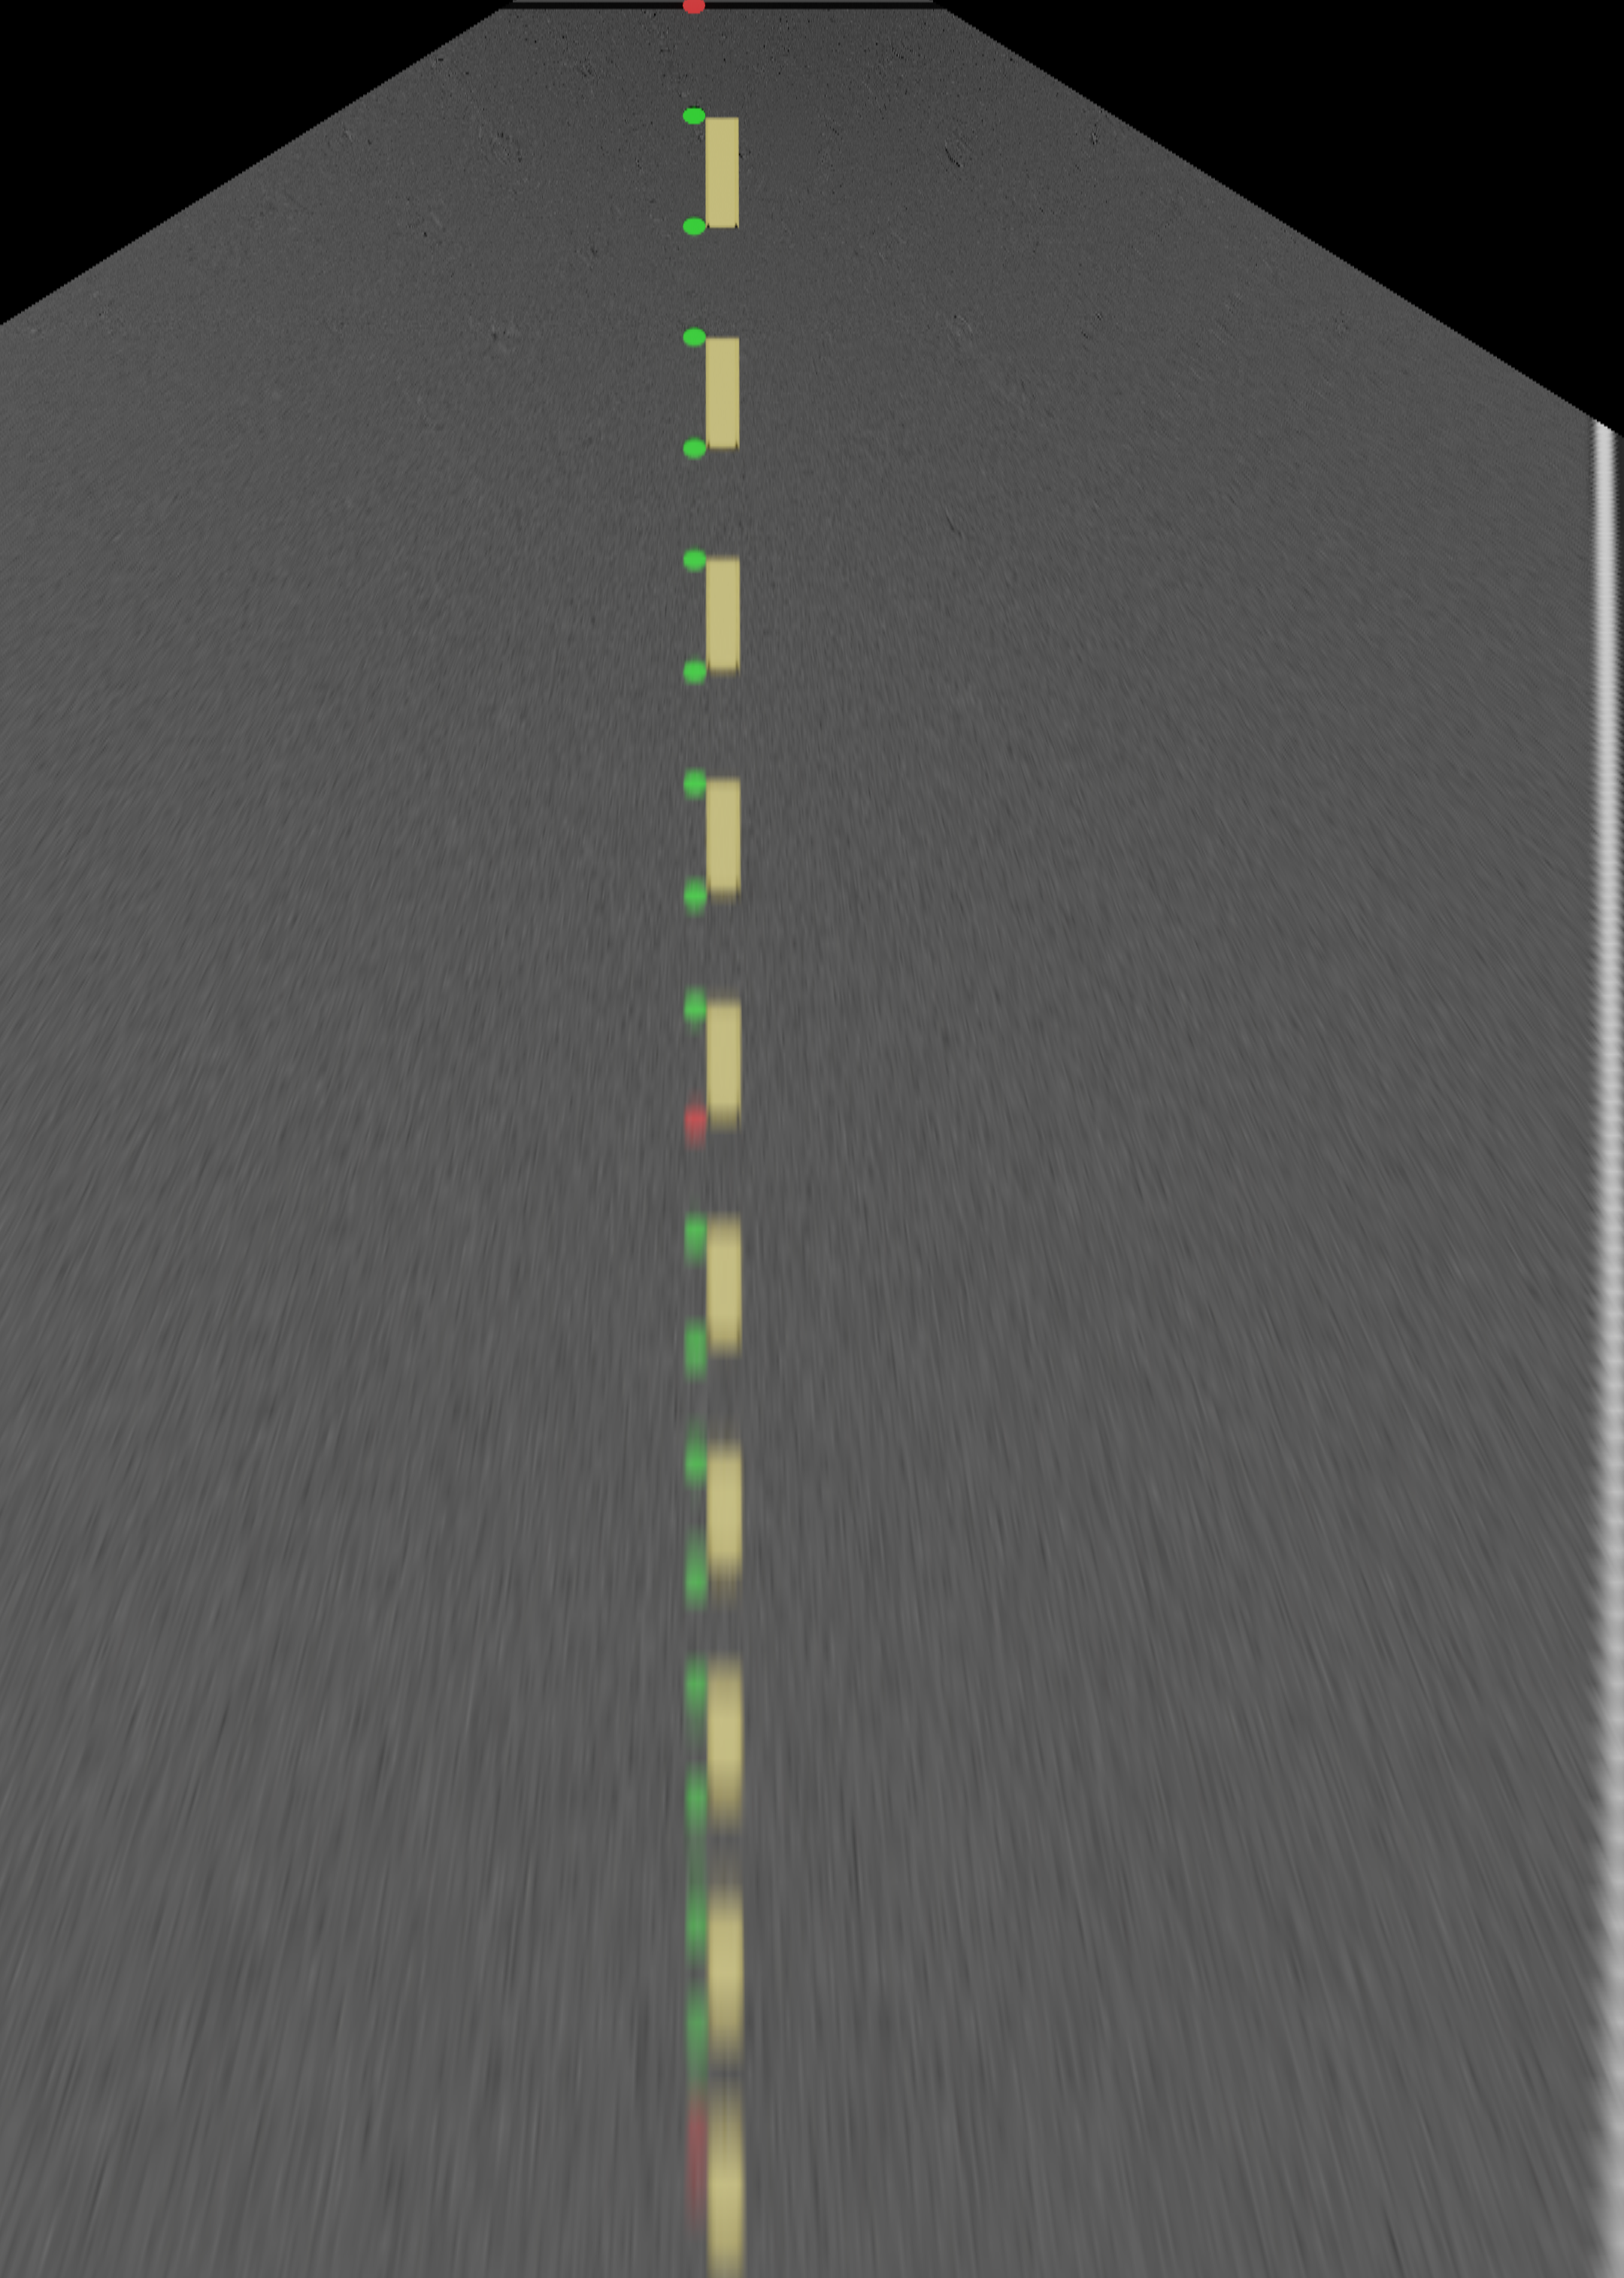

In [ ]:
import numpy as np
from sklearn.preprocessing import normalize as norm
import cv2
from google.colab.patches import cv2_imshow

def ConvertToArray(x):
  y = []
  for i in x :
    for j in i : 
      y.append(j)
  return y

lh = np.array([0,1,-341.117])
K = np.array([[800.6627, 0, 960.5406],[0, 5.4426, 543.4154],[0,0,1]])
n = np.matmul(np.transpose(K),lh)

R1 = [np.cross(lh,n)]
R2 = [np.array(np.cross(np.cross(lh,n), -n))]
R3 = [-n]

R = np.array([ConvertToArray(R1), ConvertToArray(R2), ConvertToArray(R3)])
R = R.reshape(3,3)
R = norm(R)

h = np.matmul(K, R)
h = np.matmul(h, np.linalg.inv(K))

im_src = cv2.imread("road_marks.png")
size = [2160,2160]
im_dst = cv2.warpPerspective(im_src, h,size)
im_dst = cv2.resize(im_dst, (2160,6480))
cv2_imshow(im_dst[1200:4230,:])

In [ ]:
w